In [1]:
import pandas as pd

In [6]:
df = pd.read_excel(r"C:\Users\CHARAN\Downloads\EastWestAirlines.xlsx", sheet_name="data")

In [7]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
df.iloc[:,1:12]=SS.fit_transform(df.iloc[:,1:12])
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,2,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,3,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,4,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,5,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,4018,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,4019,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,4020,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [9]:
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
import numpy as np


In [16]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=5,metric="euclidean",linkage="complete")
Y = hierarchical_cluster.fit_predict(df.iloc[:,1:12])
Y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [18]:
hierarchical_cluster.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

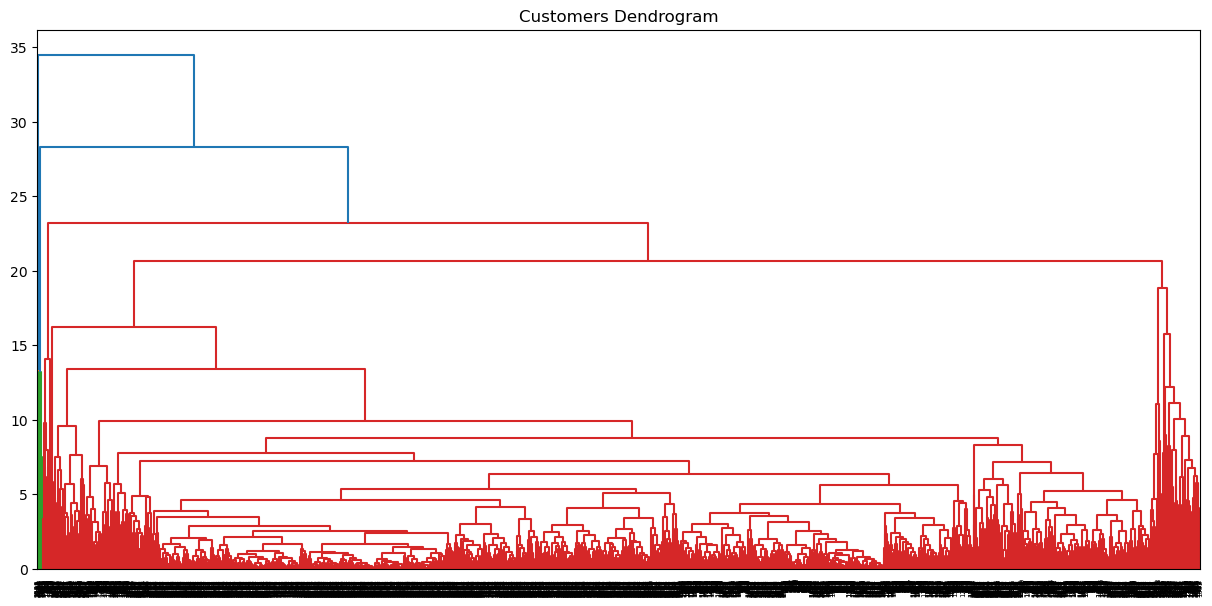

In [24]:
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.title("Customers Dendrogram")
Dendrogram=shc.dendrogram(shc.linkage(df.iloc[:,1:12],method="complete"))

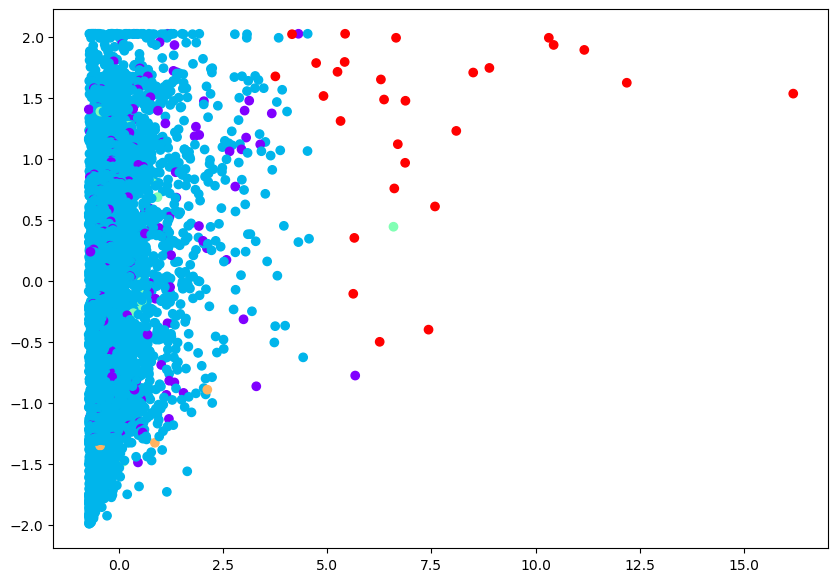

In [25]:
plt.figure(figsize=(10,7))
plt.scatter(df.iloc[:,1],df.iloc[:,10],c=hierarchical_cluster.labels_,cmap='rainbow')

In [27]:
from sklearn.cluster import KMeans
Inertia_Value =[]
for i in range(1,10):
    Kmeans =KMeans(n_clusters=i,random_state=45,n_init="auto")
    Kmeans.fit(df.iloc[:,:12])
    Inertia_Value.append(Kmeans.inertia_)
print(Inertia_Value)

[5386844822.646414, 1347764958.1372504, 598109096.0160462, 337381469.40622765, 215534661.91756892, 149523342.4241839, 110048569.10459639, 84486730.92421141, 66660429.41263941]


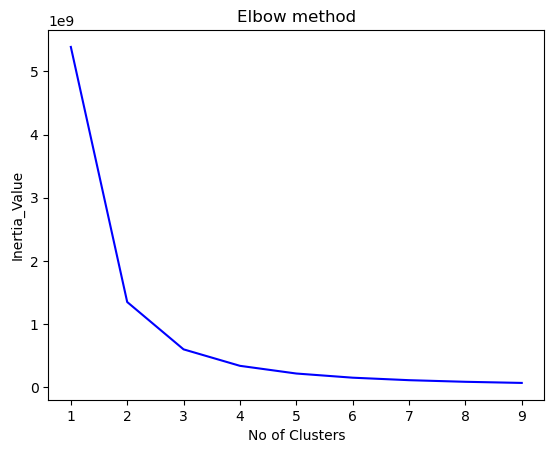

In [28]:
plt.plot(range(1,10),Inertia_Value,color="blue")
plt.xlabel("No of Clusters")
plt.title("Elbow method")
plt.ylabel("Inertia_Value")
plt.show()

In [29]:
cluster_new =KMeans(5,random_state=45,n_init="auto")
cluster_new.fit(df.iloc[:,1:12])


KMeans(n_clusters=5, n_init='auto', random_state=45)

In [30]:
cluster_new.labels_

array([1, 1, 1, ..., 2, 0, 0])

In [31]:
from sklearn.cluster import DBSCAN

In [32]:
dbscan = DBSCAN(eps=0.8,min_samples=6)
dbscan.fit(df.iloc[:,1:12])

DBSCAN(eps=0.8, min_samples=6)

In [33]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)